In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

In [37]:
df = pd.read_csv(r"C:\Users\kedha\Downloads\Student Info.csv")

In [3]:
import plotly.express as px 

# Create a frequency plot
fig = px.histogram(df, x='school', color='failures',
                   title='Frequency of Failures for Each School',
                   labels={'school': 'School Code', 'failures': 'Number of Failures'},
                   category_orders={'school': ['LVA', 'GP', 'SLA', 'MS']},
                   color_discrete_sequence=px.colors.sequential.Plasma)

# Show the plot
fig.show()

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,SLA,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,SLA,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,SLA,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,SLA,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [64]:
df = df.replace({'yes':1,'no':0})
df = df.replace({'GP':1,'LVA':2,'MS':3,'SLA':4})
df = df.replace({'GT3':1,'LE3':2})
df = df.replace({'U':1,'R':2})
df = df.replace({'A':1,'T':2})
df = df.replace({'teacher':1,'health':2,'at_home':3,'other':4,'services':5})

In [56]:
df['grade_overall'] = df['G1'] + df['G2'] + df['G3']
df['Alc_Tot'] = df['Dalc'] + df['Walc']*0.4
df['Alc_Tot'] = round((round(df['Alc_Tot']*10/7)-2)*10/8)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,grade_overall,Alc_Tot
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,17,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,16,0.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,25,4.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,44,0.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,26,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,SLA,F,19,R,GT3,T,2,3,services,other,...,2,1,2,5,4,10,11,10,31,1.0
1040,SLA,F,18,U,LE3,T,3,1,teacher,services,...,4,1,1,1,4,15,15,16,46,0.0
1041,SLA,F,18,U,GT3,T,1,1,other,other,...,1,1,1,5,6,11,12,9,32,0.0
1042,SLA,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,6,10,10,10,30,6.0


In [65]:
data = df
li = list(data.columns)

In [113]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

x = df['grade_overall']

for i in li:
    y = df[i]
    model = sm.OLS(x,y).fit()
    print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          grade_overall   R-squared (uncentered):                   0.733
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                              2867.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):                   1.59e-301
Time:                        22:14:52   Log-Likelihood:                         -4508.0
No. Observations:                1044   AIC:                                      9018.
Df Residuals:                    1043   BIC:                                      9023.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [68]:
import statsmodels.formula.api as smf

model = smf.ols("grade_overall ~ Medu + Fedu + age + Mjob + Fjob + traveltime + studytime + freetime + goout + famrel + Walc + health + absences",data = data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          grade_overall   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     11.02
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.31e-22
Time:                        06:28:38   Log-Likelihood:                -3780.3
No. Observations:                1044   AIC:                             7589.
Df Residuals:                    1030   BIC:                             7658.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.4941      4.692      9.056      0.000      33.286      51.702
Medu           1.2291      0.344      3.576      0.000       0.555       1.904
Fedu           0.5140      0.345      1.492      0.136      -0.162       1.190
age           -0.6038      0.235     -2.567      0.010      -1.065      -0.142
Mjob           0.0336      0.237      0.142      0.887      -0.432       0.499
Fjob          -0.5389      0.296     -1.823      0.069      -1.119       0.041
traveltime    -0.7918      0.400     -1.978      0.048      -1.578      -0.006
studytime      1.7122      0.351      4.875      0.000       1.023       2.401
freetime      -0.2784      0.294     -0.948      0.343      -0.855       0.298
goout         -0.6218      0.285     -2.181      0.029      -1.181      -0.062
famrel         0.6176      0.313      1.971      0.049       0.003       1.232
Walc          -0.1476      0.257     -0.574      0.566      -0.652       0.357
health        -0.5670      0.203     -2.790      0.005      -0.966      -0.168
absences      -0.0915      0.047     -1.951      0.051      -0.184       0.001
==============================================================================
Omnibus:                       42.564   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.160
Skew:                          -0.457   Prob(JB):                     2.11e-11
Kurtosis:                       3.542   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
import statsmodels.formula.api as smf

model = smf.ols("grade_overall ~ Medu + Fedu",data = data)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          grade_overall   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     56.57
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.17e-13
Time:                        22:01:35   Log-Likelihood:                -3820.7
No. Observations:                1044   AIC:                             7645.
Df Residuals:                    1042   BIC:                             7655.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7304      0.734     39.117      0.0

In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [61]:
pivot = pd.pivot_table(df,
            values = ['G1', 'G2', 'G3'],
            index = ['Alc_Tot'], 
                       columns= ['failures'],
                       aggfunc='mean', 
                       margins=True).fillna(0)
pivot

G1                                                   G2  \
failures          0          1         2         3        All          0   
Alc_Tot                                                                    
0.0       11.942943   9.513514  9.000000  7.100000  11.506394  12.084084   
1.0       11.936759   9.074074  6.750000  8.000000  11.541667  11.968379   
2.0       11.687500   8.923077  7.833333  8.000000  10.942308  11.725000   
4.0       11.367925   9.176471  7.400000  7.000000  10.832061  11.452830   
5.0       12.058824   7.800000  9.000000  8.200000  10.400000  12.000000   
6.0       10.794872   9.066667  9.000000  0.000000  10.267857  11.102564   
8.0       11.000000  10.000000  9.000000  0.000000  10.400000  11.200000   
9.0       10.222222   0.000000  9.000000  0.000000  10.100000   9.555556   
10.0      10.263158   8.500000  0.000000  7.666667   9.791667  10.631579   
All       11.736353   9.175000  8.272727  7.600000  11.213602  11.829268   

                                                            G3             \
failures          1          2         3        All          0          1   
Alc_Tot                                                                     
0.0        9.351351   9.181818  7.300000  11.621483  12.294294   9.054054   
1.0        8.851852   7.750000  6.750000  11.545139  12.221344   7.851852   
2.0        8.384615   6.333333  6.600000  10.750000  12.175000   7.076923   
4.0        8.058824   7.200000  7.000000  10.748092  11.452830   8.647059   
5.0        8.600000   8.666667  7.400000  10.333333  12.176471   9.200000   
6.0        9.066667   8.500000  0.000000  10.464286  11.384615   8.266667   
8.0       10.500000  10.000000  0.000000  10.800000  11.400000   8.750000   
9.0        0.000000   9.000000  0.000000   9.500000  10.111111   0.000000   
10.0      10.000000   0.000000  8.333333  10.291667  10.842105  10.000000   
All        8.933333   8.121212  7.200000  11.246169  12.054588   8.425000   

                                          
failures          2         3        All  
Alc_Tot                                   
0.0        9.909091  6.400000  11.769821  
1.0        6.500000  6.250000  11.649306  
2.0        5.166667  7.000000  10.884615  
4.0        5.400000  7.333333  10.763359  
5.0        5.000000  7.000000  10.100000  
6.0       10.000000  0.000000  10.500000  
8.0       10.000000  0.000000  10.200000  
9.0        9.000000  0.000000  10.000000  
10.0       0.000000  7.666667  10.375000  
All        7.484848  6.800000  11.341954

<Axes: xlabel='None-failures', ylabel='Alc_Tot'>

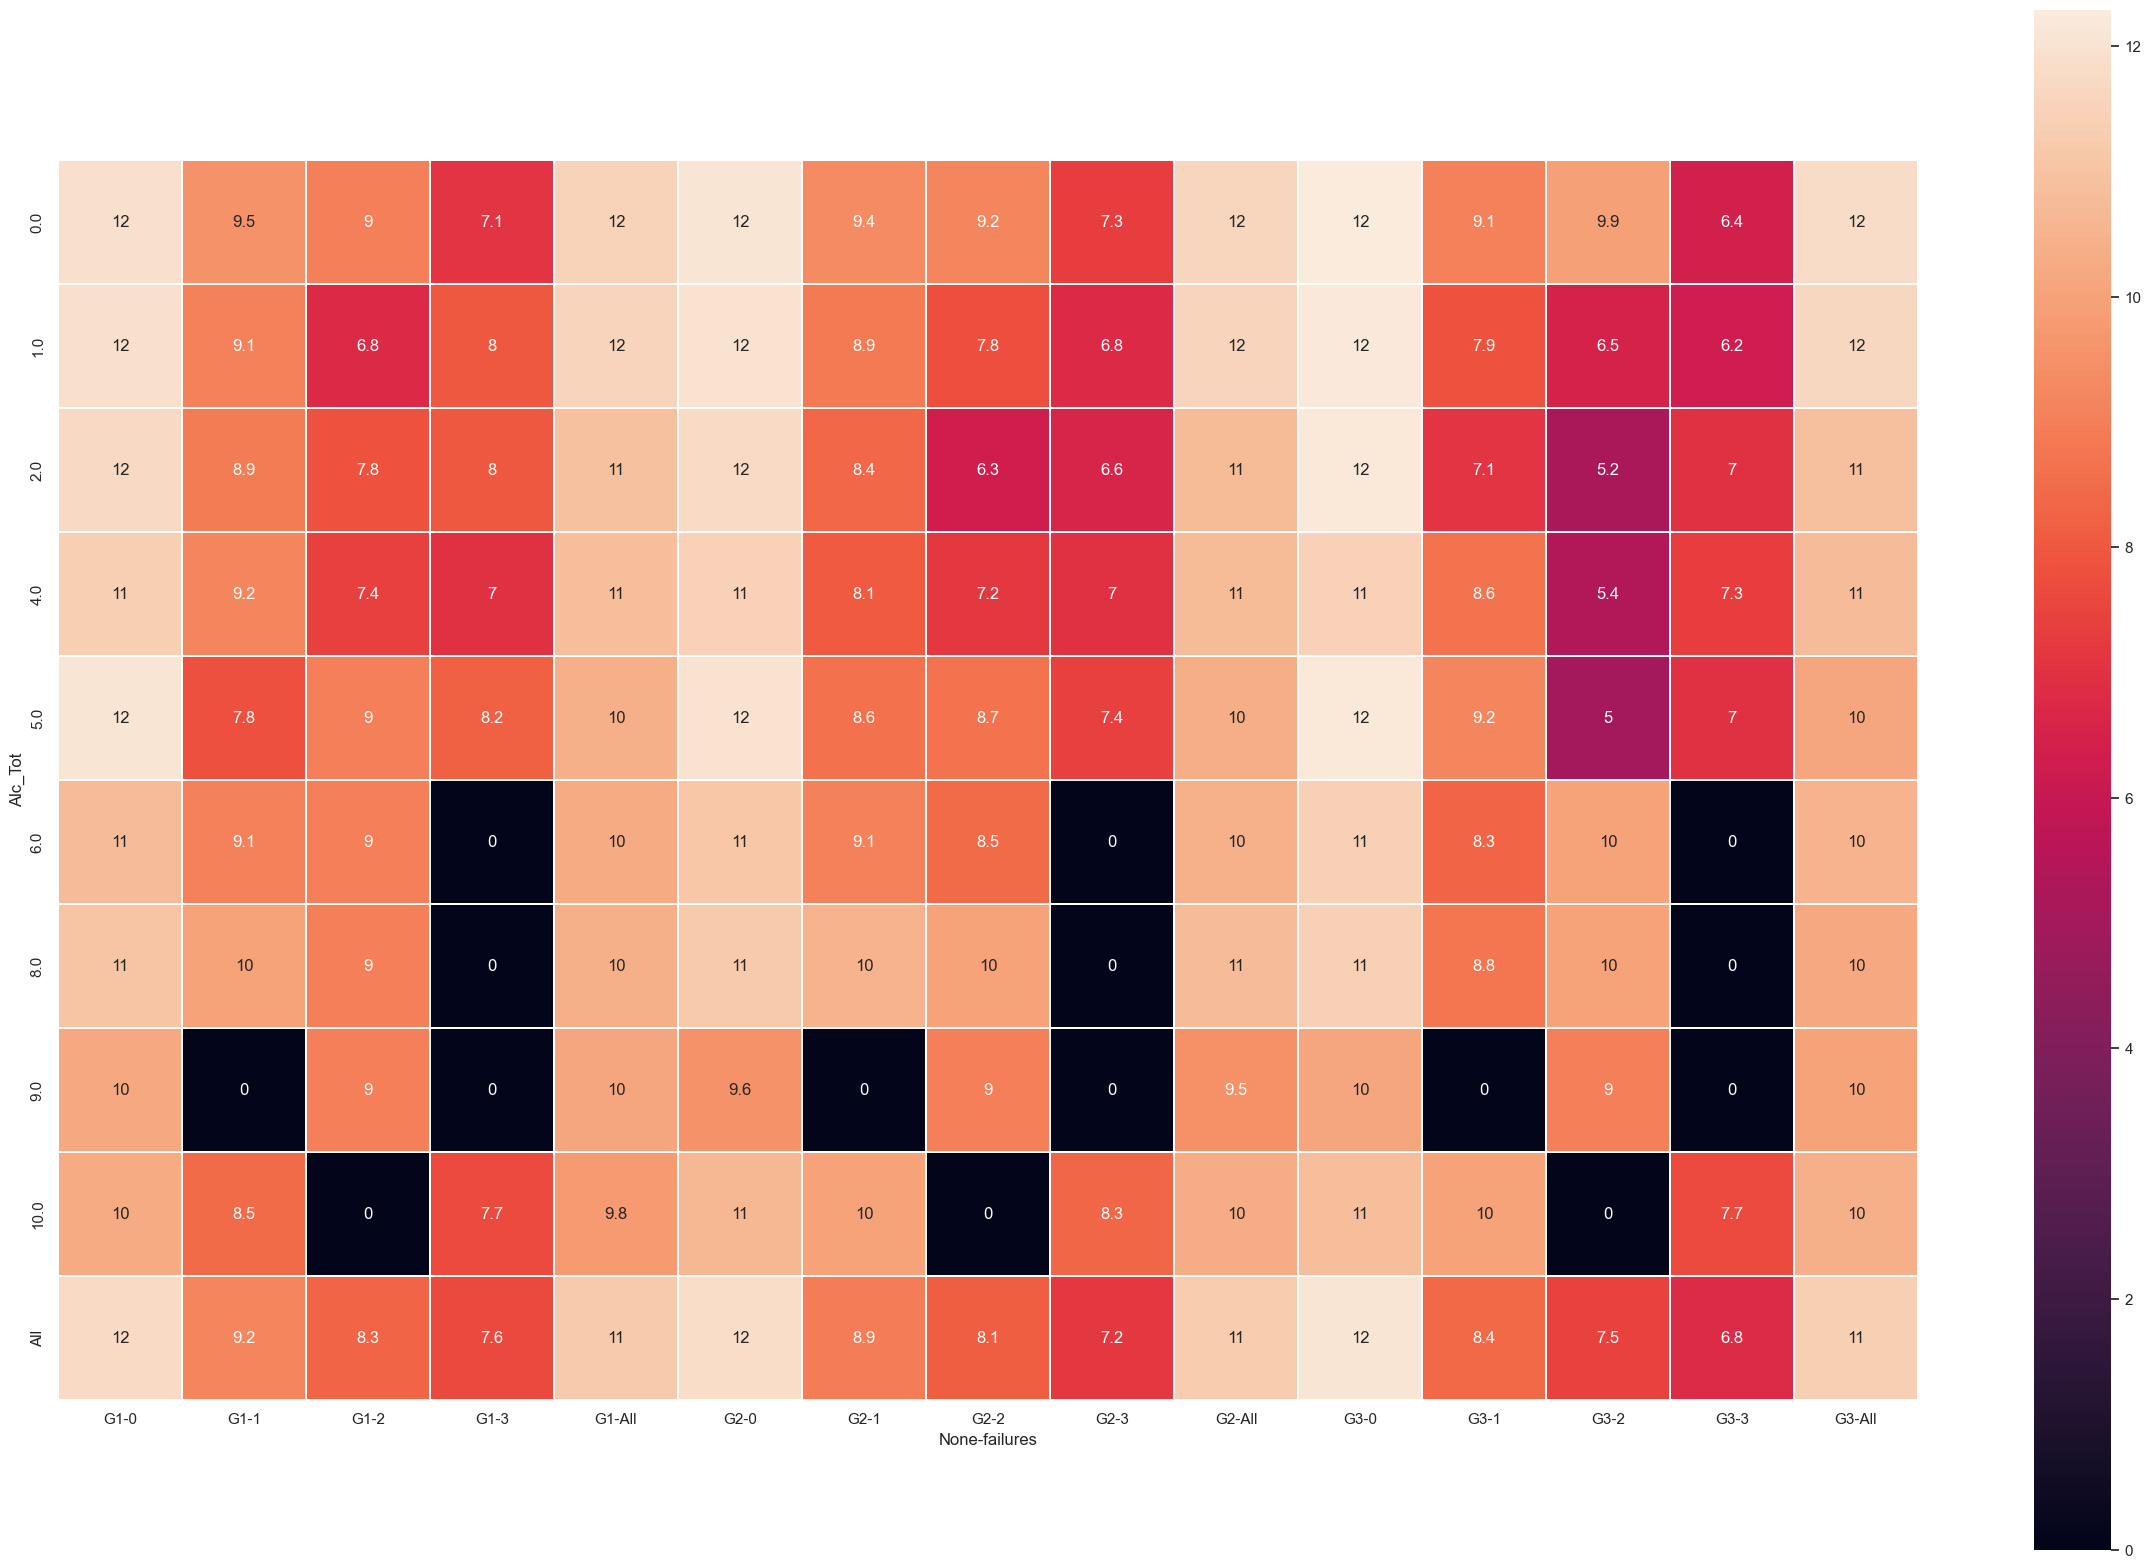

In [63]:
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
plt.subplots(figsize = (30, 20))
sns.heatmap(pivot,linewidths=0.2,square=True, annot = True )

<Figure size 1200x800 with 0 Axes>

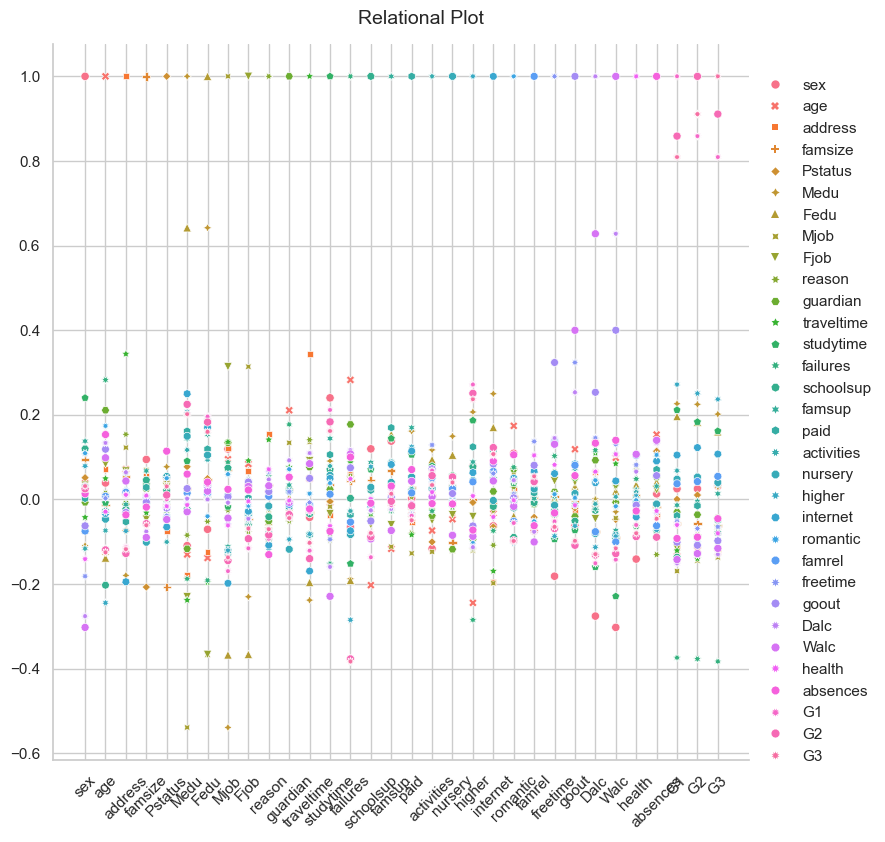

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))


df_relplot = df.drop('school', axis=1)


sns.set(style="whitegrid")
g = sns.relplot(data=df_relplot.corr(), kind="scatter",height=8)
g.fig.suptitle('Relational Plot', y=1.02, fontsize=14)
plt.xticks(rotation=45)

plt.show()